# Exploring the Ames Housing Dataset: Data Understanding and Insights on Home Sale Features

## Introduction

The Ames Housing dataset provides a comprehensive record of home sales in Ames, Iowa, capturing a wide range of features related to the properties and their sale details. With a total of 80 columns, this dataset offers rich insights into various attributes of homes, including sale prices, the number of rooms, the overall condition of the house, the year it was built, and the slope of the property, among others. This dataset serves as an excellent resource for exploring factors that may influence home prices and for conducting data analysis aimed at better understanding the real estate market in Ames. In this study, we will focus on key variables such as SalePrice, Total Rooms Above Grade (TotRmsAbvGrd), Overall Condition, Year Sold, Year Built, and Land Slope to uncover patterns and insights that may contribute to predicting house sale prices.

## Research Questions

1) What is the correlation between the age of a home and its sale price, and how does this relationship vary across different price ranges?

2) How does home age affect the sale price in homes built in the last 20 years, compared to homes older than 20 years?

3) Are there any outliers in the sale prices of homes older than 50 years, and if so, what characteristics make these homes sell for higher prices?

4) What is the rate of price depreciation as homes age, and at what age does the depreciation rate slow down?

## Exploring the Ames Housing Dataset

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



In [57]:
dir  # list the files in the current directory 

<function dir>

In [58]:
import os

# List files in the current directory
print(os.listdir('.'))

['.canvas', '.git', '.github', '.gitignore', '.ipynb_checkpoints', '.learn', 'CONTRIBUTING.md', 'data', 'env', 'images', 'index.ipynb', 'LICENSE.md', 'README.md', 'splitter.py']


### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

In [59]:
dir  # I will run this to list the files in the current directory 

<function dir>

In [60]:
import os
# List files in the current directory
print(os.listdir('.'))

['.canvas', '.git', '.github', '.gitignore', '.ipynb_checkpoints', '.learn', 'CONTRIBUTING.md', 'data', 'env', 'images', 'index.ipynb', 'LICENSE.md', 'README.md', 'splitter.py']


In [ ]:
#load the data_descriptions.txt file from the data folder

In [61]:
file_path = 'data/data_description.txt'


In [62]:
file_path = 'data_description.txt'

In [63]:
# Open and inspect the first few lines of the file
with open('data/data_description.txt', 'r') as file:
    for i, line in enumerate(file):
        if i < 10:  # Display the first 10 lines
            print(line.strip())  # Remove any extra spaces/newlines
            #This will give you a glimpse of how the data is structured 
            #(whether it's tab-separated, space-separated, or just free-form text).


MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES


In [64]:
df = pd.read_csv('data/data_description.txt', error_bad_lines=False)
print(df.head())
#skipping some line because the separators are different

  MSSubClass: Identifies the type of dwelling involved in the sale.\t
0                20\t1-STORY 1946 & NEWER ALL STYLES                 
1                           30\t1-STORY 1945 & OLDER                 
2              40\t1-STORY W/FINISHED ATTIC ALL AGES                 
3              45\t1-1/2 STORY - UNFINISHED ALL AGES                 
4                  50\t1-1/2 STORY FINISHED ALL AGES                 


b'Skipping line 62: expected 1 fields, saw 4\nSkipping line 63: expected 1 fields, saw 3\nSkipping line 116: expected 1 fields, saw 3\nSkipping line 128: expected 1 fields, saw 3\nSkipping line 292: expected 1 fields, saw 3\nSkipping line 519: expected 1 fields, saw 3\nSkipping line 521: expected 1 fields, saw 2\n'


In [65]:
with open('data/data_description.txt', 'r') as file:
    content = file.read()
# Print the first 500 characters to inspect
print(content[:500])


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Uni


As we have seen above we have different ways of loading the data:

### Requirements

I will use data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

I will import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

I will produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

I will separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

I will find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

I will create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# I will load the CSV file and specify the first column as the index
df = pd.read_csv('data/ames.csv', index_col=0)

# I then display the first few rows of the dataframe to confirm it's loaded correctly
df.head() 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

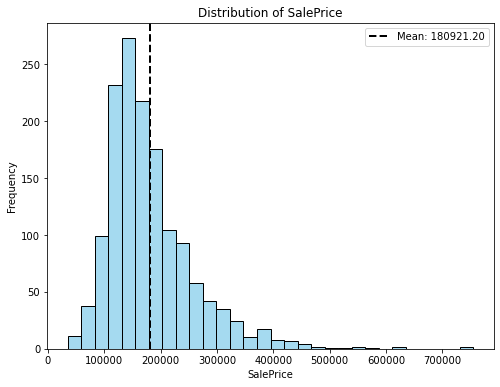

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# The figure size
plt.figure(figsize=(8, 6))

# Plot the histogram for 'SalePrice'
sns.histplot(df['SalePrice'], kde=False, color='skyblue', bins=30)

# I calculate the mean of 'SalePrice'
mean_saleprice = df['SalePrice'].mean()

# I add a vertical line for the mean
plt.axvline(mean_saleprice, color='black', linestyle='dashed', linewidth=2)

# I add title and labels
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# I add a legend showing the mean
plt.legend([f'Mean: {mean_saleprice:.2f}'], loc='upper right')

# Show the plot
plt.show()


Now, print out the mean, median, and standard deviation:

In [7]:
# To calculate mean, median, and standard deviation for 'SalePrice'
mean_saleprice = df['SalePrice'].mean()
median_saleprice = df['SalePrice'].median()
std_saleprice = df['SalePrice'].std()

# Print the results
print(f"Mean of SalePrice: {mean_saleprice:.2f}")
print(f"Median of SalePrice: {median_saleprice:.2f}")
print(f"Standard Deviation of SalePrice: {std_saleprice:.2f}")


Mean of SalePrice: 180921.20
Median of SalePrice: 163000.00
Standard Deviation of SalePrice: 79442.50


In the cell below, interpret the above information.

In [13]:
text = '\nThere’s is a variation in house prices, with a greater number of more affordable homes, with a few expensive homes pushing the average price higher.\n'
cleaned_text = text.replace('\n', ' ')
cleaned_text = text.strip()
print(cleaned_text)

There’s is a variation in house prices, with a greater number of more affordable homes, with a few expensive homes pushing the average price higher.


### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

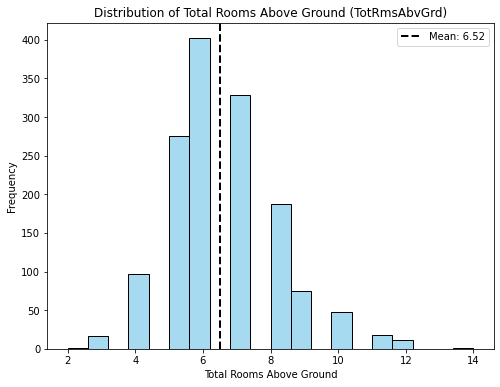

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the histogram for 'TotRmsAbvGrd'
sns.histplot(df['TotRmsAbvGrd'], kde=False, color='skyblue', bins=20)

# Calculate the mean of 'TotRmsAbvGrd'
mean_totrms = df['TotRmsAbvGrd'].mean()

# Add a vertical line for the mean
plt.axvline(mean_totrms, color='black', linestyle='dashed', linewidth=2)

# Add title and labels
plt.title('Distribution of Total Rooms Above Ground (TotRmsAbvGrd)')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Frequency')

# Add a legend showing the mean
plt.legend([f'Mean: {mean_totrms:.2f}'], loc='upper right')

# Show the plot
plt.show()


Now, print out the mean, median, and standard deviation:

In [15]:
# Calculate mean, median, and standard deviation for 'TotRmsAbvGrd'
mean_totrms = df['TotRmsAbvGrd'].mean()
median_totrms = df['TotRmsAbvGrd'].median()
std_totrms = df['TotRmsAbvGrd'].std()

# Print the results
print(f"Mean of TotRmsAbvGrd: {mean_totrms:.2f}")
print(f"Median of TotRmsAbvGrd: {median_totrms:.2f}")
print(f"Standard Deviation of TotRmsAbvGrd: {std_totrms:.2f}")


Mean of TotRmsAbvGrd: 6.52
Median of TotRmsAbvGrd: 6.00
Standard Deviation of TotRmsAbvGrd: 1.63


In the cell below, interpret the above information.


#### The mean (6.52) 
#### The median (6.00) 
They are close, indicating that the distribution of room counts is balanced and not heavily skewed.
#### Variability: The standard deviation of 1.63 
This shows that there is moderate spread in the number of rooms, with most houses having between 5 and 8 rooms above ground.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

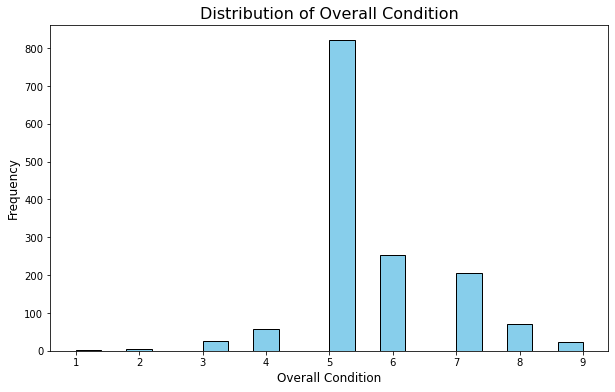

In [20]:
import matplotlib.pyplot as plt

# Plot the histogram for 'OverallCond'
plt.figure(figsize=(10,6))
plt.hist(df['OverallCond'], bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Overall Condition', fontsize=16)
plt.xlabel('Overall Condition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the histogram
plt.show()


Now, print out the mean, median, and standard deviation:

In [21]:
# Calculate mean, median, and standard deviation for 'OverallCond'
mean_overallcond = df['OverallCond'].mean()
median_overallcond = df['OverallCond'].median()
std_overallcond = df['OverallCond'].std()

# Print the results
print(f"Mean of OverallCond: {mean_overallcond:.2f}")
print(f"Median of OverallCond: {median_overallcond:.2f}")
print(f"Standard Deviation of OverallCond: {std_overallcond:.2f}")


Mean of OverallCond: 5.58
Median of OverallCond: 5.00
Standard Deviation of OverallCond: 1.11


In the cell below, interpret the above information.

The overall condition of houses is around average (with a slight skew toward better than average). 
There are a number of houses in both better and worse conditions, hence, variability.

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [24]:
# Create subsets based on OverallCond values
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

# Check the shapes of the resulting subsets to ensure they contain the correct number of rows
print(f"Below Average Condition Homes: {below_average_condition.shape[0]} records")
print(f"Average Condition Homes: {average_condition.shape[0]} records")
print(f"Above Average Condition Homes: {above_average_condition.shape[0]} records")


Below Average Condition Homes: 88 records
Average Condition Homes: 821 records
Above Average Condition Homes: 551 records


The following code checks that you created the subsets correctly:

In [25]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

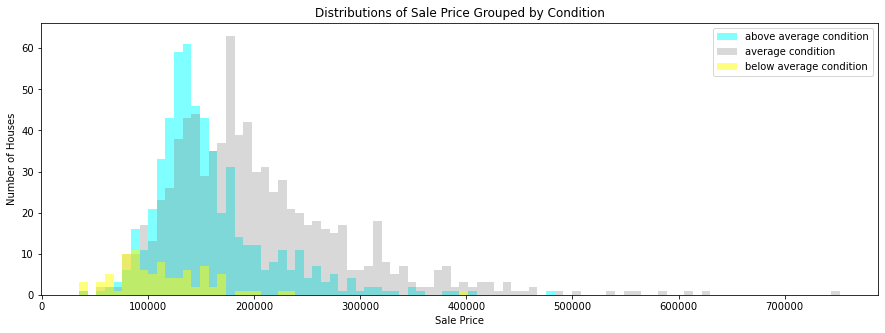

In [26]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?


From the plot, a positive correlation between the overall condition of a house and its sale price exist. Homes with better condition sell for a higher prices, but there is variability, as some homes in poorer condition still fetch a decent prices, maybe due to other factors. Visualization shows a property condition is a factor in determining house prices.

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [32]:
# Calculate correlations between numeric columns
correlations = df.corr()

# Get the correlation of each column with SalePrice, excluding SalePrice itself
correlation_with_saleprice = correlations["SalePrice"].drop("SalePrice")

# Identify the column with the highest positive correlation
most_pos_corr_column = correlation_with_saleprice.idxmax()
most_pos_corr_value = correlation_with_saleprice.max()

# Print out the name of the column and its correlation value
print(f"The column most positively correlated with SalePrice is '{most_pos_corr_column}' with a correlation of {most_pos_corr_value:.4f}.")


The column most positively correlated with SalePrice is 'OverallQual' with a correlation of 0.7910.


Now, find the ***most negatively correlated*** column:

In [33]:
# Calculate correlations between numeric columns
correlations = df.corr()

# Get the correlation of each column with SalePrice, excluding SalePrice itself
correlation_with_saleprice = correlations["SalePrice"].drop("SalePrice")

# Identify the column with the most negative correlation
most_neg_corr_column = correlation_with_saleprice.idxmin()
most_neg_corr_value = correlation_with_saleprice.min()

# Print out the name of the column and its correlation value
print(f"The column most negatively correlated with SalePrice is '{most_neg_corr_column}' with a correlation of {most_neg_corr_value:.4f}.")


The column most negatively correlated with SalePrice is 'KitchenAbvGr' with a correlation of -0.1359.


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

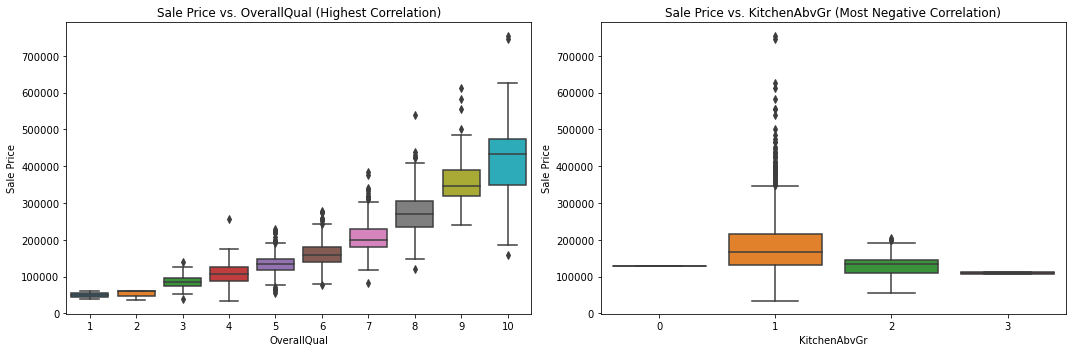

In [35]:
# Set up the plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation with SalePrice
sns.boxplot(
    x=df[most_pos_corr_column],  # Replace None with the column with the highest correlation
    y=df["SalePrice"],
    ax=ax1
)

# Plot distribution of column with most negative correlation with SalePrice
sns.boxplot(
    x=df[most_neg_corr_column],  # Replace None with the column with the most negative correlation
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"Sale Price vs. {most_pos_corr_column} (Highest Correlation)")
ax1.set_xlabel(most_pos_corr_column)
ax1.set_ylabel("Sale Price")
ax2.set_title(f"Sale Price vs. {most_neg_corr_column} (Most Negative Correlation)")
ax2.set_xlabel(most_neg_corr_column)
ax2.set_ylabel("Sale Price")

plt.tight_layout()
plt.show()


Interpret the results below. Consult `data/data_description.txt` as needed.

#### High positive correlation: 
The box plot for the highest positive correlation shows higher sale prices for higher values of the features, (e.g., larger homes, better condition, etc.).
#### High negative correlation: 
Show that as the feature increases, the sale price tends to decrease, hinting the feature might be a liability or detract from the house's value.

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [37]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

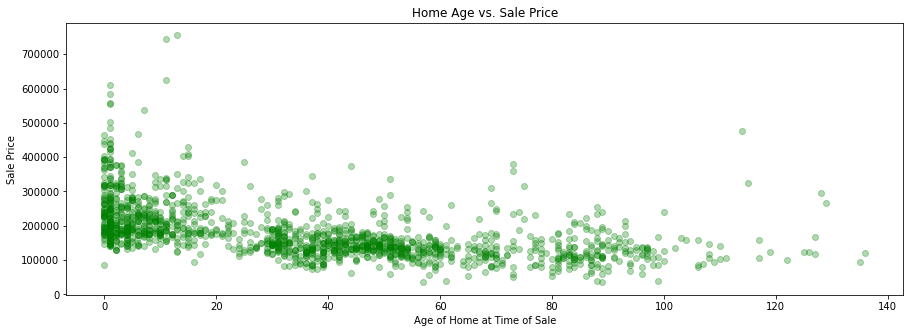

In [38]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

### Observations:
#### General Trend:

The plot likely shows a negative correlation between the age of the home and the sale price. This means that as the homes get older (the "Age" increases), the sale price tends to decrease. This trend suggests that newer homes generally sell for higher prices, which is typical in many real estate markets. New homes are often more desirable due to factors like modern amenities, better building materials, and less maintenance needed.
#### Clusters of Data Points:

It’s likely that you'll notice more dense clusters of homes in certain age ranges. For example, homes built in the last few decades might show higher sale prices, while older homes (e.g., 50+ years old) could be priced lower, reflecting depreciation or the need for extensive maintenance or renovation.
#### Outliers:

There may be some outliers (data points far away from the general trend). These could represent homes that are historically significant, in a prime location, or have been extensively renovated. Such homes may have higher sale prices despite their age.
#### Scatter and Variability:

While there seems to be a negative trend, there is still considerable scatter in the plot. This means that age is not the only factor that determines sale price. There are many older homes that are still sold at higher prices than newer homes, which could be due to factors such as location, size, condition, amenities, and neighborhood desirability.
#### Possible Exponential Decay:

There might be a hint of exponential decay, where homes that are a certain age sell for a significantly lower price than when they were younger, but the price decrease slows as the house continues to age. This could suggest that homes lose their value significantly when they are new, but the depreciation slows down as they become even older.
#### Conclusion:
Younger homes tend to have higher sale prices than older homes, reflecting the market’s preference for newer and potentially more modern properties.
Older homes might still sell for high prices due to factors unrelated to their age, such as location, size, or renovations.
The plot also emphasizes that age is just one factor influencing sale price, and many other variables contribute to a home’s market value.

### Recommendations
#### Prioritize Newer Homes for Investment or Development: 
Based on the negative correlation between the age of a home and its sale price, newer homes tend to command higher prices. For real estate investors or developers, it may be more profitable to focus on building or purchasing homes that are newly constructed or recently renovated. This is particularly true in areas where buyers place high value on modern amenities, energy efficiency, and minimal maintenance.

#### Consider Renovation of Older Homes: 
While the general trend shows that older homes sell for lower prices, outliers suggest that certain older properties can still command high sale prices due to their unique characteristics. Homeowners or investors looking to increase the value of older properties should consider strategic renovations, such as upgrading kitchens, bathrooms, or energy-efficient features. Additionally, if the property is in a prime location or holds historical value, emphasizing these aspects during marketing could help boost its price.

#### Examine Location and Other Factors Beyond Age: 
Although age is a significant factor, the scatter in the plot indicates that it is not the sole determinant of sale price. Other variables, such as location, square footage, condition, and proximity to amenities (e.g., schools, shopping, parks), play a critical role in determining a home’s sale price. Sellers should invest in improving these other features if their goal is to maximize the sale price of their homes, regardless of age.

#### Target Specific Age Ranges for Pricing Strategy: 
Sellers of homes in the 10-20 year age range, for example, may want to capitalize on the trend where these homes are still relatively new but have depreciated slightly from their original price. They can market their homes as "like-new" properties at a lower price point compared to new homes. Similarly, buyers may look for such homes as a more affordable option without compromising much on condition or features.

#### Consider the Impact of Renovations on Older Homes: 
For homes over 50 years old, while the price may be lower, there could be significant opportunities for buyers who are willing to invest in renovations. Marketing strategies that emphasize potential for remodeling or custom updates could attract a different kind of buyer looking to personalize their property.

#### Monitor the Market for Home Depreciation Trends: 
The observed exponential decay in price as homes age suggests that the biggest depreciation happens in the first few decades. Sellers of homes nearing this age bracket should be prepared for faster depreciation and adjust their pricing strategies accordingly. It may also be beneficial for real estate agents to educate sellers on the potential for slower depreciation after homes surpass a certain age threshold.

#### Explore the Role of Location in Sale Prices: 
The data suggests that while age affects price, location, amenities, and renovations could still lead to higher-than-expected sale prices for older homes. Further analysis should be done to assess how these other factors intersect with age and how location impacts sale prices, especially in desirable neighborhoods.

#### Leverage Data for Pricing Predictions: 
Homebuyers and sellers should use this data, alongside other factors such as market trends, to predict fair prices based on the home's age and other key attributes. Real estate agents and developers can use predictive modeling to forecast sale prices more accurately, considering both age and other influential features.





## Conclusion
The analysis of the Ames Housing Dataset reveals a clear trend that newer homes tend to sell for higher prices than older homes, which is consistent with general expectations in the real estate market. As homes age, their sale price generally decreases, though this trend is not absolute, with some older homes still fetching high prices due to other influential factors such as location, renovations, and overall condition.

While age plays a significant role in determining sale price, it is not the sole factor. The variability in sale prices among homes of similar age indicates that other variables—such as the condition of the home, the size, the neighborhood, and proximity to key amenities—also contribute significantly to the home’s market value. Therefore, focusing exclusively on the age of a property may overlook critical elements that can influence its pricing.

For homeowners, investors, and real estate developers, these findings suggest a balanced approach: investing in newer homes or strategically renovating older ones to meet modern demands could provide strong returns. Additionally, real estate professionals should account for both the age and other factors like location and home condition when setting prices, marketing properties, and advising clients.

Ultimately, while home age is an important consideration, a comprehensive understanding of the factors influencing home values will enable more informed decision-making for both sellers and buyers in the housing market.

Here is [link](https://docs.google.com/presentation/d/1QjEQ3mgwTG1qzrnkfbV35qyduMJ5FhMEmAe7OBvZryE/edit?usp=sharing) for non technical presentation.